In [1]:
import numpy as np
import pandas as pd
import networkx.drawing.nx_pydot as gl
import networkx as nx
import matplotlib.pyplot as plt
from pprint import pprint
##matplotlib inline

In [2]:
# create state space and initial state probabilities

states = ['O1', 'O2', 'O3']
pi = [0.25, 0.4, 0.35]
state_space = pd.Series(pi, index=states, name='states')
print(state_space)
print(state_space.sum())

O1    0.25
O2    0.40
O3    0.35
Name: states, dtype: float64
1.0


In [3]:
# create transition matrix
# equals transition probability matrix of changing states given a state
# matrix is size (M x M) where M is number of states

q_df = pd.DataFrame(columns=states, index=states)
q_df.loc[states[0]] = [0.4, 0.2, 0.4]
q_df.loc[states[1]] = [0.45, 0.45, 0.1]
q_df.loc[states[2]] = [0.45, 0.25, .3]

print(q_df)

      O1    O2   O3
O1   0.4   0.2  0.4
O2  0.45  0.45  0.1
O3  0.45  0.25  0.3


In [4]:
q = q_df.values
print('\n')
print(q, q.shape)
print('\n')
print(q_df.sum(axis=1))




[[0.4 0.2 0.4]
 [0.45 0.45 0.1]
 [0.45 0.25 0.3]] (3, 3)


O1    1.0
O2    1.0
O3    1.0
dtype: float64


In [5]:
from pprint import pprint

# create a function that maps transition probability dataframe
# to markov edges and weights

def _get_markov_edges(Q):
    edges = {}
    for col in Q.columns:
        for idx in Q.index:
            edges[(idx,col)] = Q.loc[idx,col]
    return edges

edges_wts = _get_markov_edges(q_df)
pprint(edges_wts)

{('O1', 'O1'): 0.4,
 ('O1', 'O2'): 0.2,
 ('O1', 'O3'): 0.4,
 ('O2', 'O1'): 0.45,
 ('O2', 'O2'): 0.45,
 ('O2', 'O3'): 0.1,
 ('O3', 'O1'): 0.45,
 ('O3', 'O2'): 0.25,
 ('O3', 'O3'): 0.3}


In [6]:
# create graph object
G = nx.MultiDiGraph()

In [7]:
# nodes correspond to states
G.add_nodes_from(states)
print('Nodes:\n')
print(G.nodes())
print('\n')

Nodes:

['O1', 'O2', 'O3']




In [9]:

# edges represent transition probabilities
for k, v in edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
print('Edges:')
pprint(G.edges(data=True))

Edges:
OutMultiEdgeDataView([('O1', 'O1', {'weight': 0.4, 'label': 0.4}), ('O1', 'O2', {'weight': 0.2, 'label': 0.2}), ('O1', 'O3', {'weight': 0.4, 'label': 0.4}), ('O2', 'O1', {'weight': 0.45, 'label': 0.45}), ('O2', 'O2', {'weight': 0.45, 'label': 0.45}), ('O2', 'O3', {'weight': 0.1, 'label': 0.1}), ('O3', 'O1', {'weight': 0.45, 'label': 0.45}), ('O3', 'O2', {'weight': 0.25, 'label': 0.25}), ('O3', 'O3', {'weight': 0.3, 'label': 0.3})])


<ipython-input-10-4a1a445e3a46>:1: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')


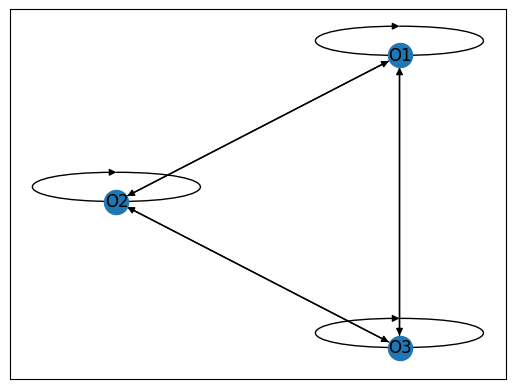

In [10]:
pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos)

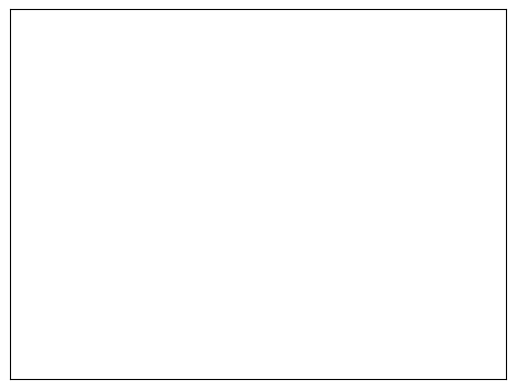

In [11]:
# create edge labels for jupyter plot but is not necessary
edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'markov.dot')
plt.show()

In [12]:
# create state space and initial state probabilities

hidden_states = ['S1', 'S2']
pi = [0.5, 0.5]
print('\n')
state_space = pd.Series(pi, index=hidden_states, name='states')
print(state_space)
print('\n')
print(state_space.sum())




S1    0.5
S2    0.5
Name: states, dtype: float64


1.0


In [13]:
# create hidden transition matrix
# a or alpha
#   = transition probability matrix of changing states given a state
# matrix is size (M x M) where M is number of states

a_df = pd.DataFrame(columns=hidden_states, index=hidden_states)
a_df.loc[hidden_states[0]] = [0.7, 0.3]
a_df.loc[hidden_states[1]] = [0.4, 0.6]

print(a_df)

     S1   S2
S1  0.7  0.3
S2  0.4  0.6


In [14]:
a = a_df.values
print('\n')
print(a)
print(a.shape)
print('\n')
print(a_df.sum(axis=1))



[[0.7 0.3]
 [0.4 0.6]]
(2, 2)


S1    1.0
S2    1.0
dtype: float64


In [15]:
# create matrix of observation (emission) probabilities
# b or beta = observation probabilities given state
# matrix is size (M x O) where M is number of states
# and O is number of different possible observations

observable_states = states

b_df = pd.DataFrame(columns=observable_states, index=hidden_states)
b_df.loc[hidden_states[0]] = [0.2, 0.6, 0.2]
b_df.loc[hidden_states[1]] = [0.4, 0.1, 0.5]

print(b_df)

     O1   O2   O3
S1  0.2  0.6  0.2
S2  0.4  0.1  0.5


In [16]:
b = b_df.values
print('\n')
print(b)
print(b.shape)
print('\n')
print(b_df.sum(axis=1))




[[0.2 0.6 0.2]
 [0.4 0.1 0.5]]
(2, 3)


S1    1.0
S2    1.0
dtype: float64


In [17]:
# create graph edges and weights

hide_edges_wts = _get_markov_edges(a_df)
pprint(hide_edges_wts)

emit_edges_wts = _get_markov_edges(b_df)
pprint(emit_edges_wts)

# create graph object
G = nx.MultiDiGraph()

{('S1', 'S1'): 0.7, ('S1', 'S2'): 0.3, ('S2', 'S1'): 0.4, ('S2', 'S2'): 0.6}
{('S1', 'O1'): 0.2,
 ('S1', 'O2'): 0.6,
 ('S1', 'O3'): 0.2,
 ('S2', 'O1'): 0.4,
 ('S2', 'O2'): 0.1,
 ('S2', 'O3'): 0.5}


In [18]:
# nodes correspond to states
G.add_nodes_from(hidden_states)
print('Nodes:\n')
print(G.nodes())
print('\n')

Nodes:

['S1', 'S2']




In [19]:
# edges represent hidden probabilities
for k, v in hide_edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)

# edges represent emission probabilities
for k, v in emit_edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)

print('Edges:')
pprint(G.edges(data=True))

Edges:
OutMultiEdgeDataView([('S1', 'S1', {'weight': 0.7, 'label': 0.7}), ('S1', 'S2', {'weight': 0.3, 'label': 0.3}), ('S1', 'O1', {'weight': 0.2, 'label': 0.2}), ('S1', 'O2', {'weight': 0.6, 'label': 0.6}), ('S1', 'O3', {'weight': 0.2, 'label': 0.2}), ('S2', 'S1', {'weight': 0.4, 'label': 0.4}), ('S2', 'S2', {'weight': 0.6, 'label': 0.6}), ('S2', 'O1', {'weight': 0.4, 'label': 0.4}), ('S2', 'O2', {'weight': 0.1, 'label': 0.1}), ('S2', 'O3', {'weight': 0.5, 'label': 0.5})])


<ipython-input-20-e5c76f0145f7>:1: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='neato')


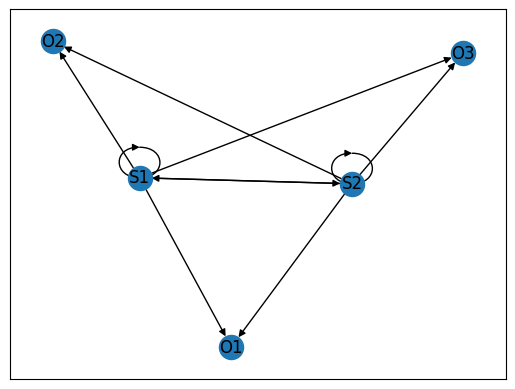

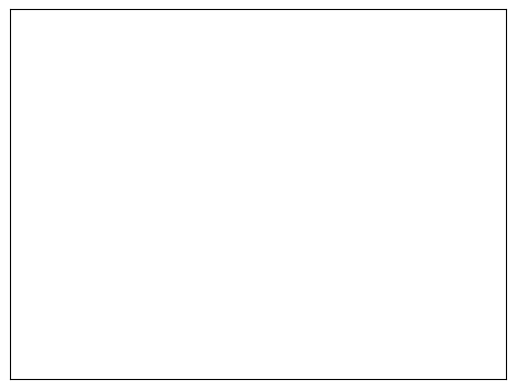

In [20]:
pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='neato')
nx.draw_networkx(G, pos)
plt.show()

# create edge labels
emit_edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=emit_edge_labels)
#plt.show()
nx.drawing.nx_pydot.write_dot(G, 'hidden_markov.dot')


In [21]:
# observation sequence of dog's behaviors
# observations are encoded numerically

obs_map = {'O1':0, 'O2':1, 'O3':2}
obs = np.array([1,1,2,1,0,1,2,1,0,2,2,0,1,0,1])

inv_obs_map = dict((v,k) for k, v in obs_map.items())
obs_seq = [inv_obs_map[v] for v in list(obs)]

print( pd.DataFrame(np.column_stack([obs, obs_seq]),
                columns=['Obs_code', 'Obs_seq']) )

   Obs_code Obs_seq
0         1      O2
1         1      O2
2         2      O3
3         1      O2
4         0      O1
5         1      O2
6         2      O3
7         1      O2
8         0      O1
9         2      O3
10        2      O3
11        0      O1
12        1      O2
13        0      O1
14        1      O2


In [22]:
def viterbi(pi,a,b,obs):

	nStates = np.shape(b)[0]
	T = np.shape(obs)[0]

	path = np.zeros(T)
	delta = np.zeros((nStates,T))
	phi = np.zeros((nStates,T))

	delta[:,0] = pi * b[:,obs[0]]
	phi[:,0] = 0

	for t in range(1,T):
		for s in range(nStates):
			delta[s,t] = np.max(delta[:,t-1]*a[:,s])*b[s,obs[t]]
			phi[s,t] = np.argmax(delta[:,t-1]*a[:,s])

	path[T-1] = np.argmax(delta[:,T-1])
	for t in range(T-2,-1,-1):
		#path[t] = phi[int(path[t+1]): int(t+1) , int(t+1)]
		path[t] = phi[int(path[t+1]) , int(t+1)]

	return path,delta, phi

In [23]:
path, delta, phi = viterbi(pi, a, b, obs)
print('\n')
print('single best state path: ', path)
print('delta:\n', delta)
print('phi:\n', phi)



single best state path:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
delta:
 [[3.00000000e-01 1.26000000e-01 1.76400000e-02 7.40880000e-03
  1.03723200e-03 4.35637440e-04 6.09892416e-05 2.56154815e-05
  3.58616741e-06 5.02063437e-07 7.37725866e-08 2.21317760e-08
  1.59348787e-08 2.23088302e-09 9.36970868e-10]
 [5.00000000e-02 9.00000000e-03 1.89000000e-02 1.13400000e-03
  8.89056000e-04 5.33433600e-05 6.53456160e-05 3.92073696e-06
  3.07385778e-06 9.22157333e-07 2.76647200e-07 6.63953280e-08
  3.98371968e-09 1.91218545e-09 1.14731127e-10]]
phi:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.]]


In [24]:
state_map = {0:'S1', 1:'S2'}
state_path = [state_map[v] for v in path]

In [25]:
result = (pd.DataFrame()
 .assign(Observation=obs_seq)
 .assign(Best_Path=state_path))

print(result)

   Observation Best_Path
0           O2        S1
1           O2        S1
2           O3        S1
3           O2        S1
4           O1        S1
5           O2        S1
6           O3        S1
7           O2        S1
8           O1        S2
9           O3        S2
10          O3        S2
11          O1        S2
12          O2        S1
13          O1        S1
14          O2        S1
